In [37]:
import numpy as np
import torch
import numpy as np

#from https://realpython.com/generative-adversarial-networks/
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [38]:
#initialize random 
torch.manual_seed(111)

In [39]:
#implement the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256), #the input is two-dimensional
            nn.ReLU(),
            nn.Dropout(0.3), #droput layers reduce overfitting
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),#sigmoid activation to represent probability
        )

    def forward(self, x):
        output = self.model(x)
        return output
    

#implement the generator
class Generator(nn.Module):
     def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(2, 16),
             nn.ReLU(),
             nn.Linear(16, 32),
             nn.ReLU(),
             nn.Linear(32, 2),
         )

     def forward(self, x):
         output = self.model(x)
         return output

##  Question 1

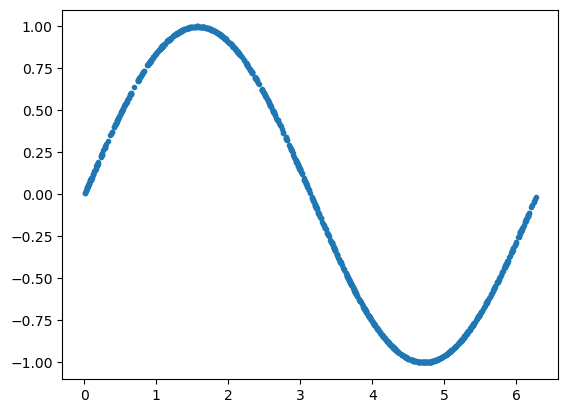

In [40]:
#prepare th training data
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length) #random numbers between 0 and 1.
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]
plt.plot(train_data[:, 0], train_data[:, 1], ".")#load data into the pytorch data loader
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [41]:
#set the training parameters
lr = 0.0005
num_epochs = 1000
loss_function = nn.BCELoss() #binary cross entropy loss
#Cross entropy loss measures the difference between the discovered probability distribution
#of a machine learning classification model and the predicted distribution.
#measures how well a classification model performs

Epoch: 0 Loss D.: 0.3045273721218109
Epoch: 0 Loss G.: 1.0049834251403809


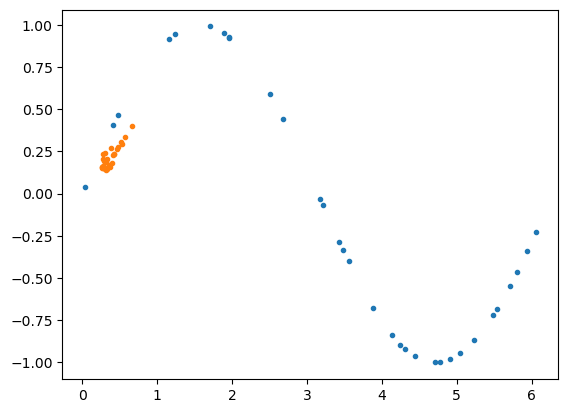

Epoch: 50 Loss D.: 0.6697803139686584
Epoch: 50 Loss G.: 0.7509793639183044


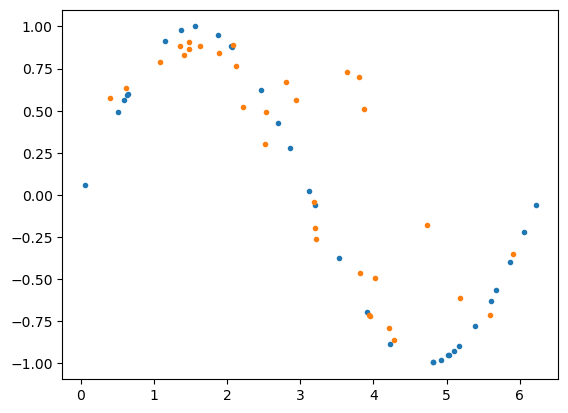

Epoch: 100 Loss D.: 0.682616114616394
Epoch: 100 Loss G.: 0.7046736478805542


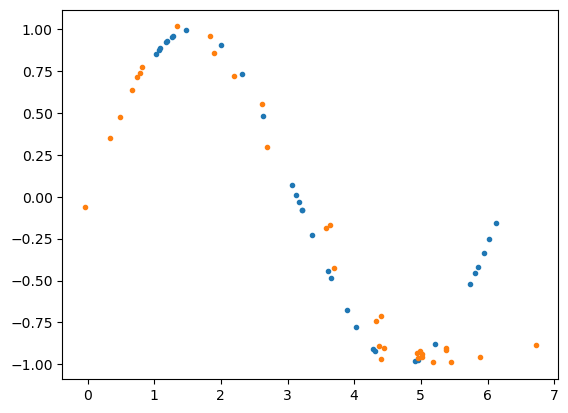

Epoch: 150 Loss D.: 0.6856653690338135
Epoch: 150 Loss G.: 0.7486344575881958


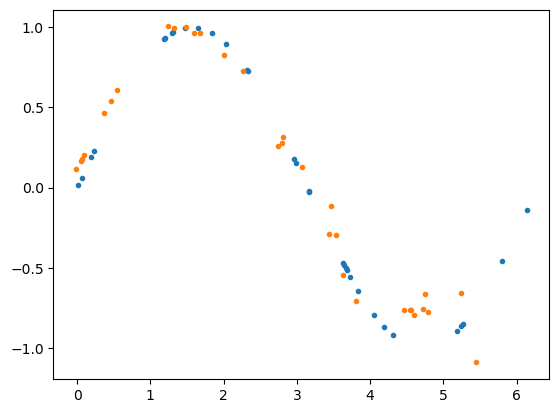

Epoch: 200 Loss D.: 0.6637575030326843
Epoch: 200 Loss G.: 0.7905353307723999


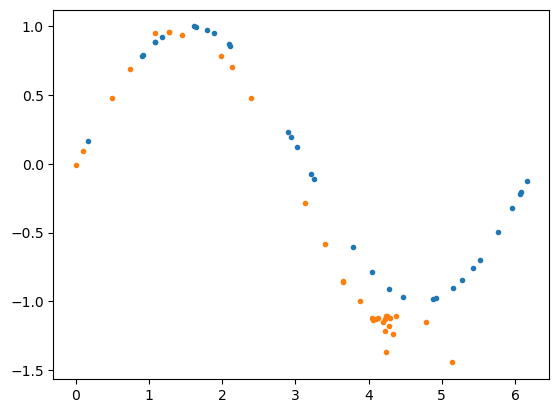

Epoch: 250 Loss D.: 0.6651290059089661
Epoch: 250 Loss G.: 0.6984397768974304


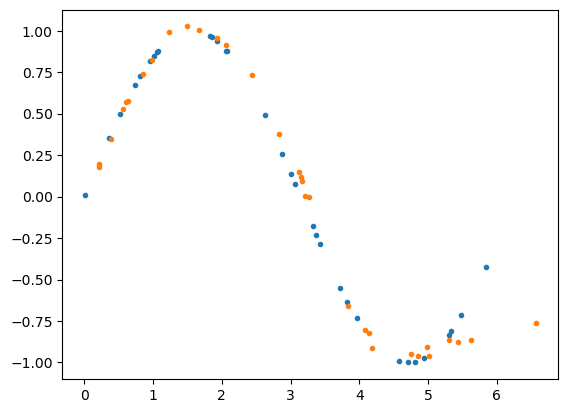

Epoch: 300 Loss D.: 0.7148540616035461
Epoch: 300 Loss G.: 0.6822734475135803


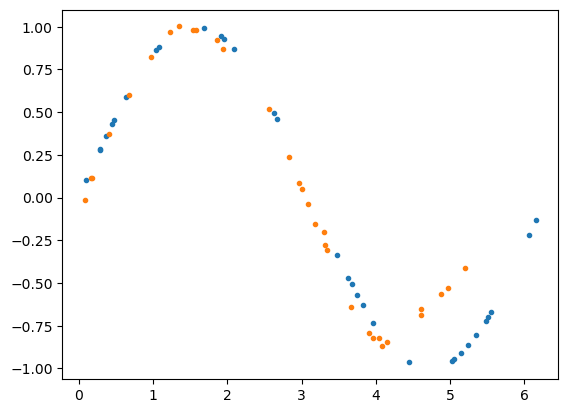

Epoch: 350 Loss D.: 0.6730053424835205
Epoch: 350 Loss G.: 0.7275388240814209


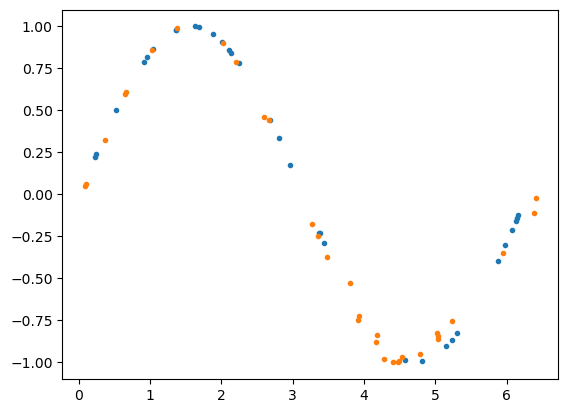

Epoch: 400 Loss D.: 0.6717224717140198
Epoch: 400 Loss G.: 0.7034971714019775


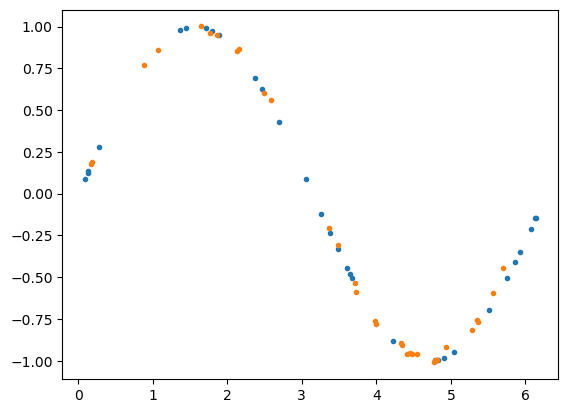

Epoch: 450 Loss D.: 0.6811791658401489
Epoch: 450 Loss G.: 0.7140961289405823


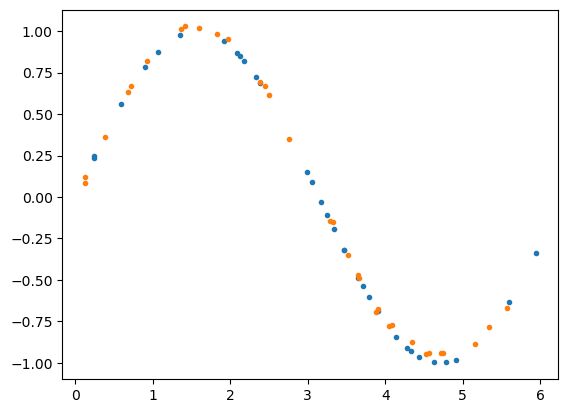

Epoch: 500 Loss D.: 0.6914202570915222
Epoch: 500 Loss G.: 0.738437294960022


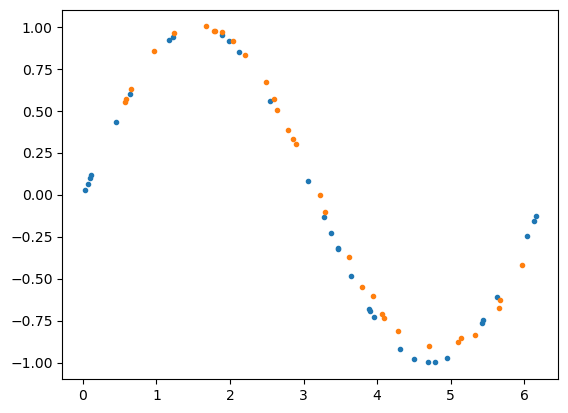

Epoch: 550 Loss D.: 0.680732786655426
Epoch: 550 Loss G.: 0.6939696669578552


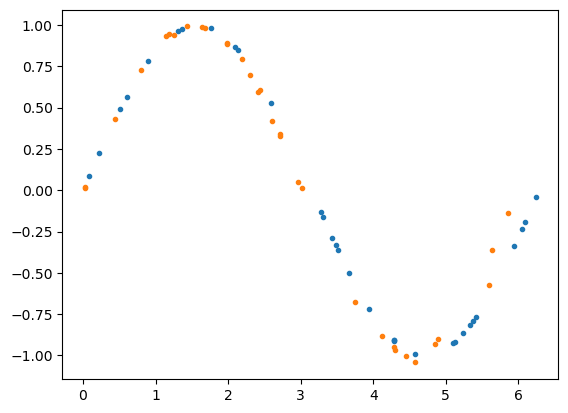

Epoch: 600 Loss D.: 0.6851186752319336
Epoch: 600 Loss G.: 0.7174177169799805


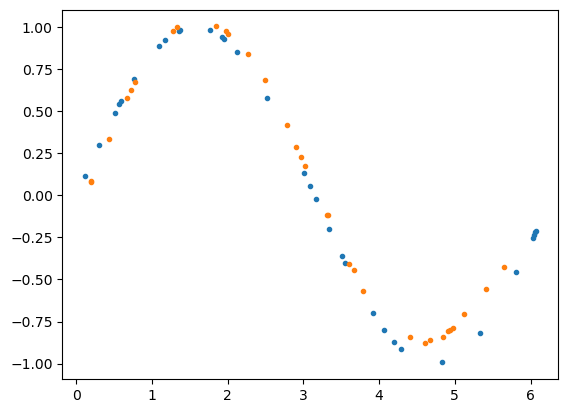

Epoch: 650 Loss D.: 0.6771645545959473
Epoch: 650 Loss G.: 0.6738659739494324


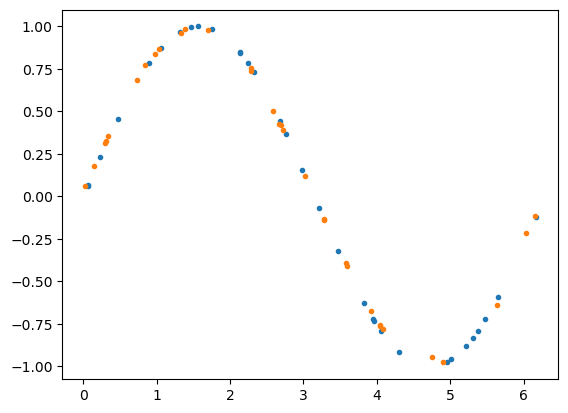

Epoch: 700 Loss D.: 0.6817591786384583
Epoch: 700 Loss G.: 0.7003651857376099


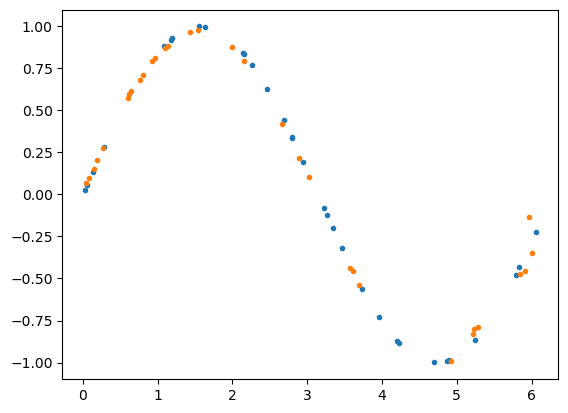

Epoch: 750 Loss D.: 0.6943541169166565
Epoch: 750 Loss G.: 0.7180423736572266


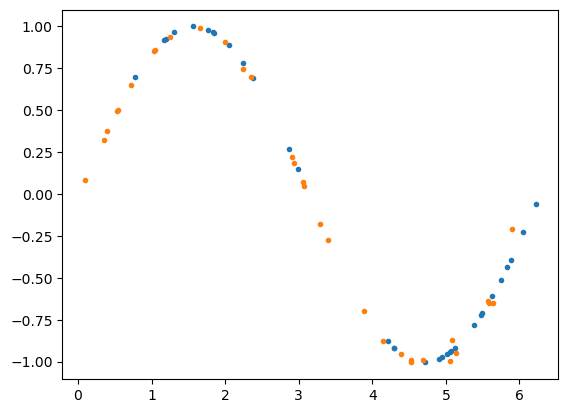

Epoch: 800 Loss D.: 0.6818224191665649
Epoch: 800 Loss G.: 0.6997256278991699


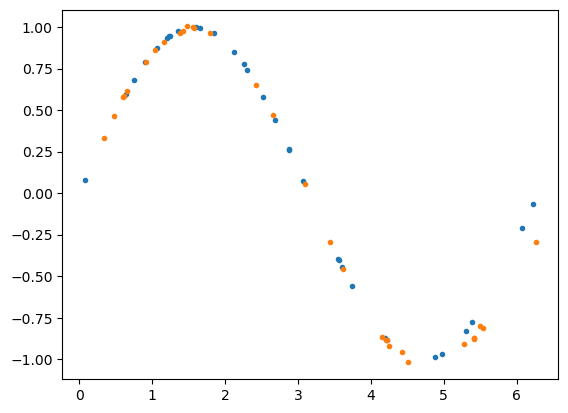

Epoch: 850 Loss D.: 0.6875669956207275
Epoch: 850 Loss G.: 0.7391026616096497


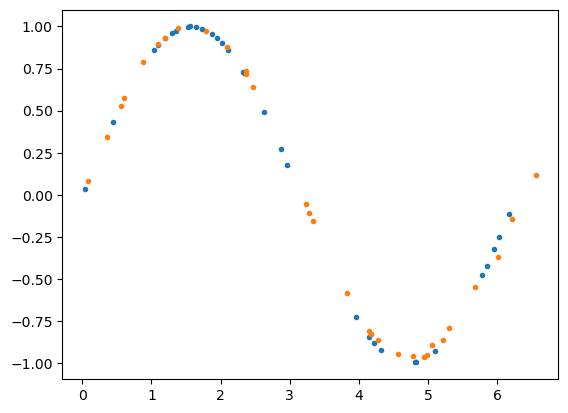

Epoch: 900 Loss D.: 0.670183539390564
Epoch: 900 Loss G.: 0.6894631385803223


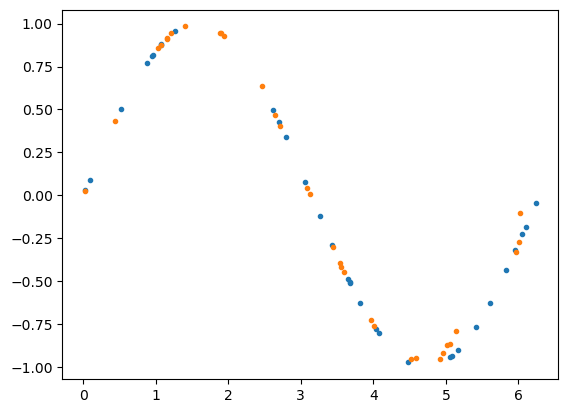

Epoch: 950 Loss D.: 0.6532220840454102
Epoch: 950 Loss G.: 0.7114608287811279


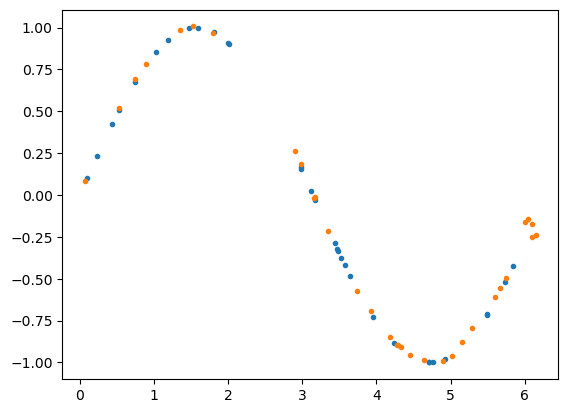

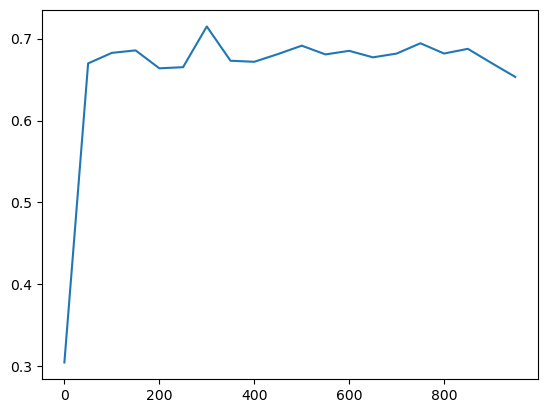

In [42]:
#training loop for the GAN
discriminator = Discriminator()
generator = Generator()
gen_loss_vector = []
discr_loss_vector = []
num_epoch_vector = []
#use Adam algorithm to update weights of numerator and discriminator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))      
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #differentiate between real and generated samples

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        #want to minimized generator loss
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        #discriminateor weights frozen since optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
        optimizer_generator.step()

        # Show loss
        if epoch % 50 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)
            
            generated_samples_for_plotting = generated_samples.detach()
            plt.figure()
            plt.plot(real_samples[:, 0], real_samples[:, 1], ".")
            plt.plot(generated_samples_for_plotting[:, 0], generated_samples_for_plotting[:, 1], ".")
            plt.show()
            


#discriminator loss
plt.plot(num_epoch_vector, discr_loss_vector) 
plt.show()

For this first question , the proposed GAN structure works fine? We simply decreased the learing rate to have a smoother curve and prevent an oscillation of the loss function at the end of training. 1000 epochs was enough to generate good data.

## Question 2

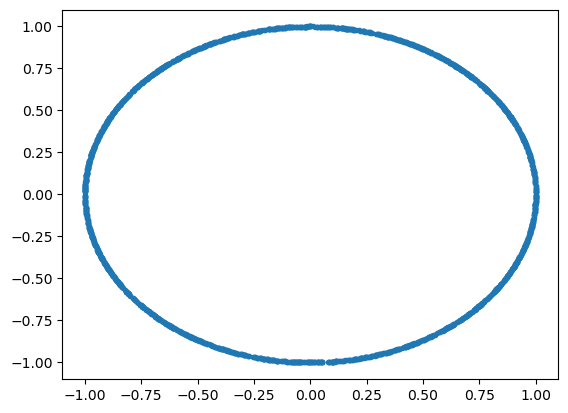

In [43]:
#prepare th training data
train_data_length = 2048
train_data = torch.zeros((train_data_length, 2))
angles = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 0] = torch.cos(angles)
train_data[:, 1] = torch.sin(angles)
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]
plt.plot(train_data[:, 0], train_data[:, 1], ".")#load data into the pytorch data loader
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

Epoch: 0 Loss D.: 0.6601853370666504
Epoch: 0 Loss G.: 0.700962483882904


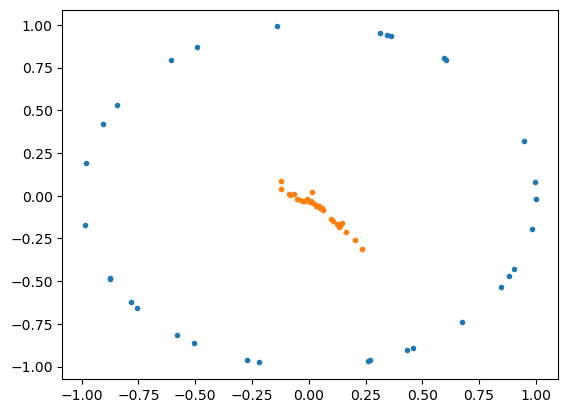

Epoch: 50 Loss D.: 0.5476188659667969
Epoch: 50 Loss G.: 0.7830327749252319


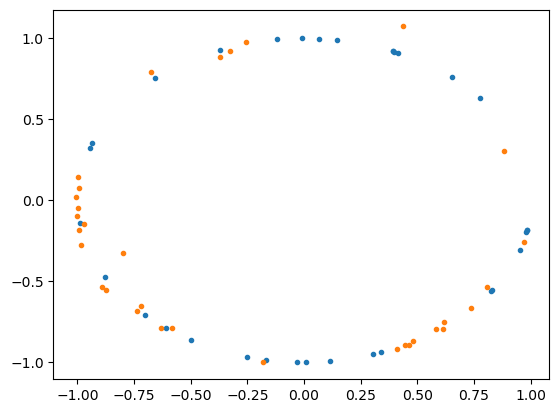

Epoch: 100 Loss D.: 0.6067992448806763
Epoch: 100 Loss G.: 0.8813350200653076


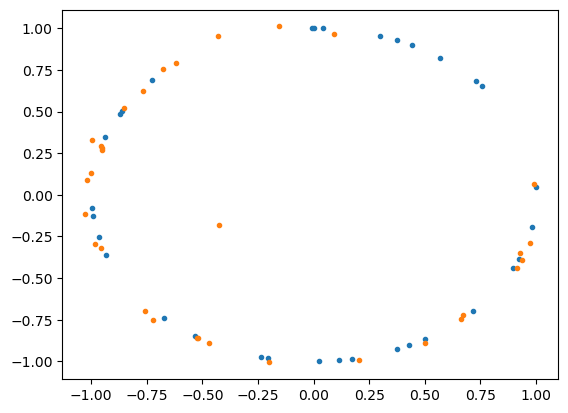

Epoch: 150 Loss D.: 0.6870592832565308
Epoch: 150 Loss G.: 0.9362051486968994


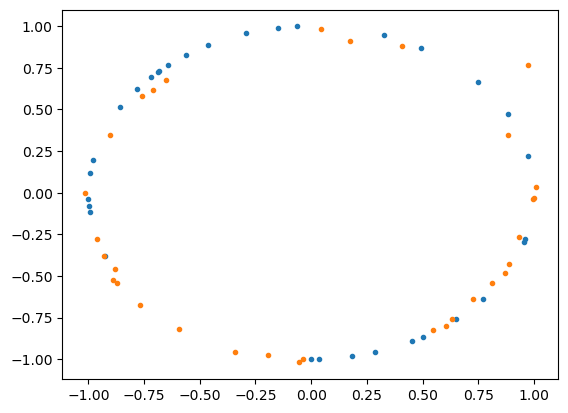

Epoch: 200 Loss D.: 0.6564797759056091
Epoch: 200 Loss G.: 0.7252432107925415


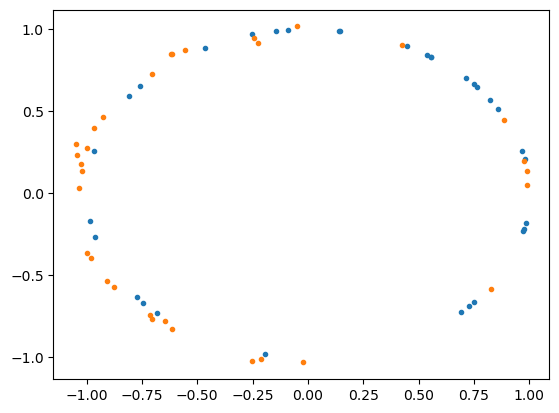

Epoch: 250 Loss D.: 0.6950604915618896
Epoch: 250 Loss G.: 0.710441529750824


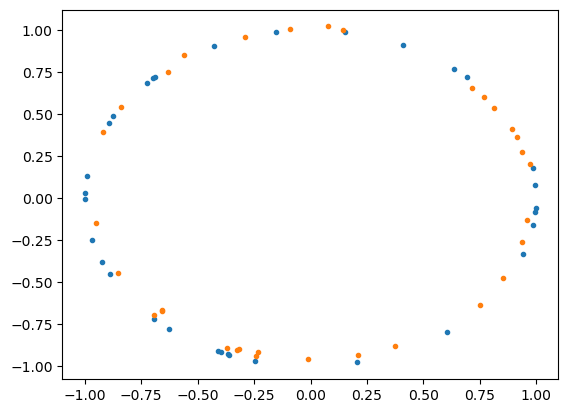

Epoch: 300 Loss D.: 0.6903097033500671
Epoch: 300 Loss G.: 0.7041066288948059


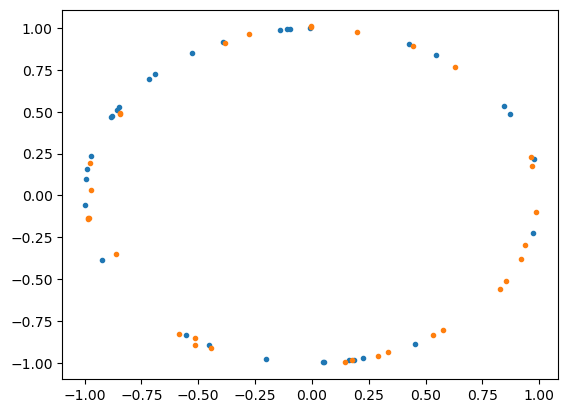

Epoch: 350 Loss D.: 0.6942976117134094
Epoch: 350 Loss G.: 0.686171293258667


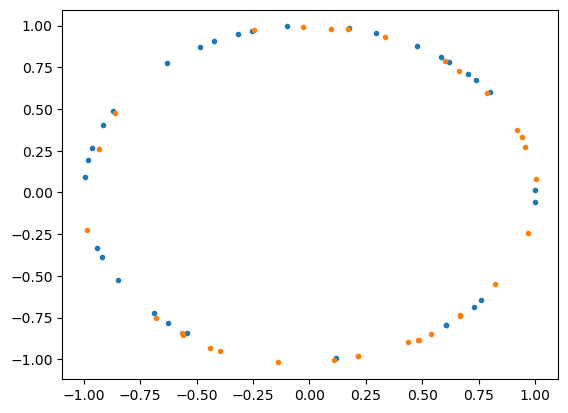

Epoch: 400 Loss D.: 0.6967386603355408
Epoch: 400 Loss G.: 0.6775885224342346


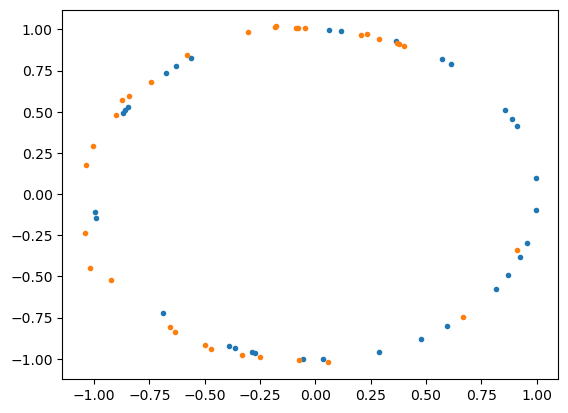

Epoch: 450 Loss D.: 0.6907795667648315
Epoch: 450 Loss G.: 0.6979190111160278


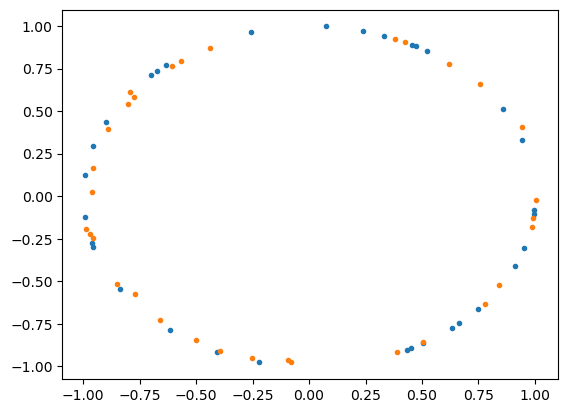

Epoch: 500 Loss D.: 0.6965824365615845
Epoch: 500 Loss G.: 0.6828078627586365


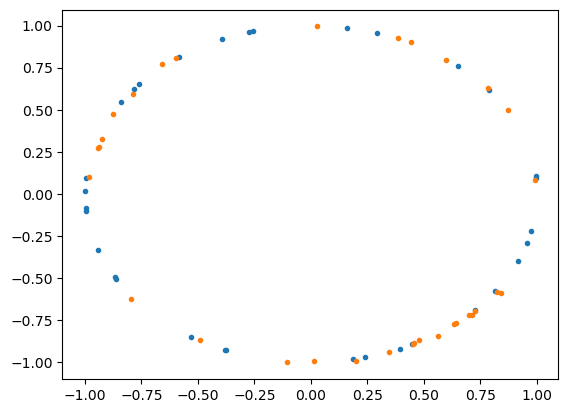

Epoch: 550 Loss D.: 0.6972461342811584
Epoch: 550 Loss G.: 0.6950011253356934


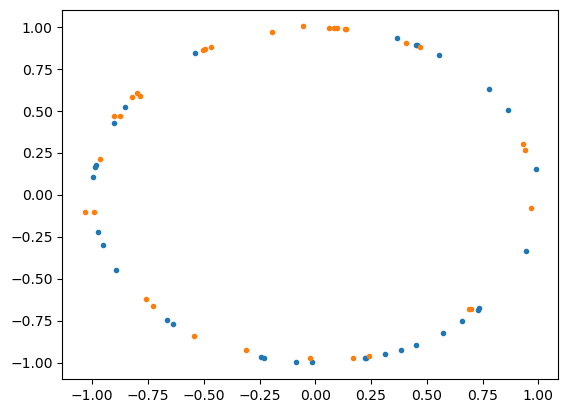

Epoch: 600 Loss D.: 0.690545916557312
Epoch: 600 Loss G.: 0.6903882622718811


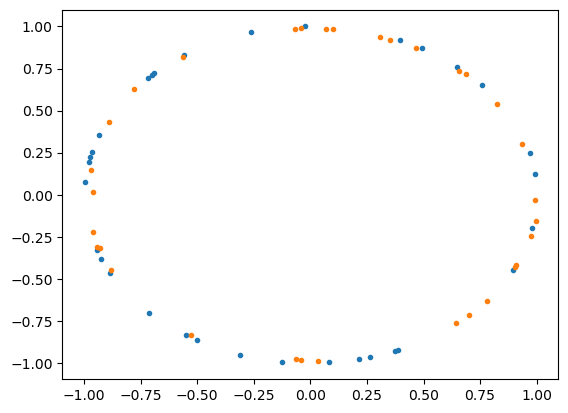

Epoch: 650 Loss D.: 0.6928921341896057
Epoch: 650 Loss G.: 0.6971323490142822


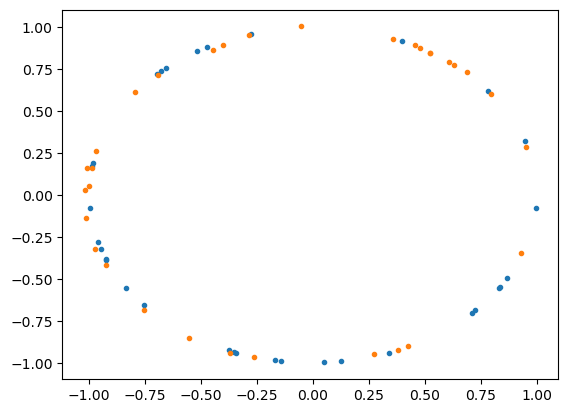

Epoch: 700 Loss D.: 0.6920117735862732
Epoch: 700 Loss G.: 0.6883760094642639


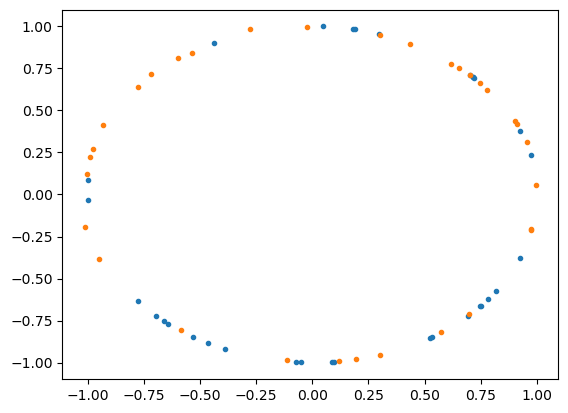

Epoch: 750 Loss D.: 0.6935076713562012
Epoch: 750 Loss G.: 0.6952434182167053


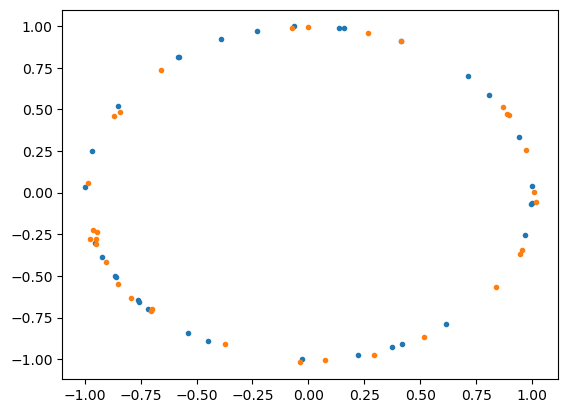

Epoch: 800 Loss D.: 0.6943528056144714
Epoch: 800 Loss G.: 0.6974118947982788


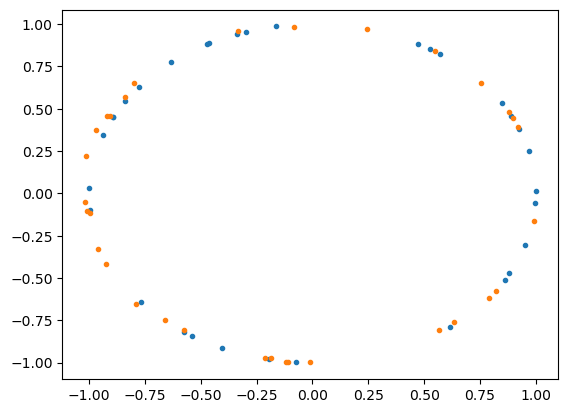

Epoch: 850 Loss D.: 0.6987413763999939
Epoch: 850 Loss G.: 0.6898987889289856


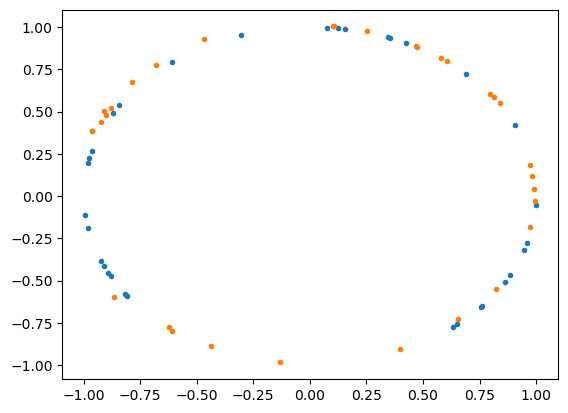

Epoch: 900 Loss D.: 0.6926900148391724
Epoch: 900 Loss G.: 0.6948444843292236


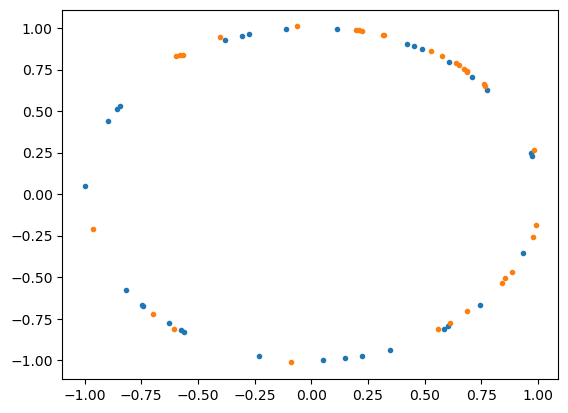

Epoch: 950 Loss D.: 0.6980486512184143
Epoch: 950 Loss G.: 0.6910505890846252


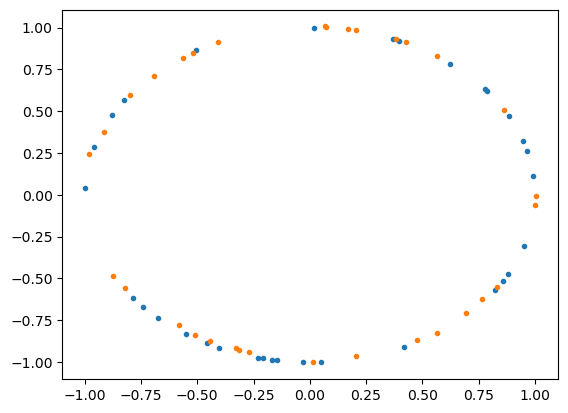

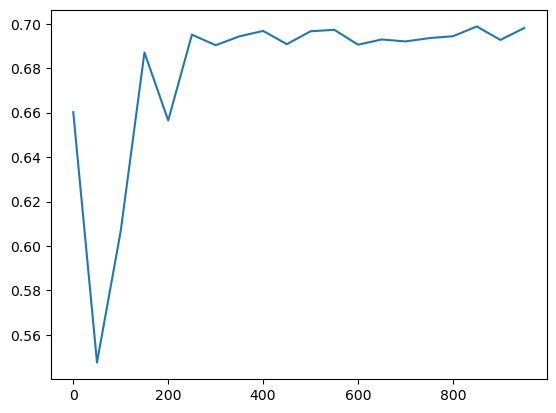

In [44]:
#training loop for the GAN
#set the training parameters
lr = 0.0002
num_epochs = 1000
discriminator = Discriminator()
generator = Generator()
gen_loss_vector = []
discr_loss_vector = []
num_epoch_vector = []
#use Adam algorithm to update weights of numerator and discriminator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))      
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #differentiate between real and generated samples

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        #want to minimized generator loss
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        #discriminateor weights frozen since optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
        optimizer_generator.step()

        # Show loss
        if epoch % 50 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)
            
            generated_samples_for_plotting = generated_samples.detach()
            plt.figure()
            plt.plot(real_samples[:, 0], real_samples[:, 1], ".")
            plt.plot(generated_samples_for_plotting[:, 0], generated_samples_for_plotting[:, 1], ".")
            plt.show()
            


#discriminator loss
plt.plot(num_epoch_vector, discr_loss_vector) 
plt.show()

For this question, we didn't modiffy the GAN stcuture, but we augmented the number of epochs to 1500 and the learning rate to 0.0002. The results are better than with the original paramters, but we can see that the loss function is still oscillating at the end of training.

## Question 3


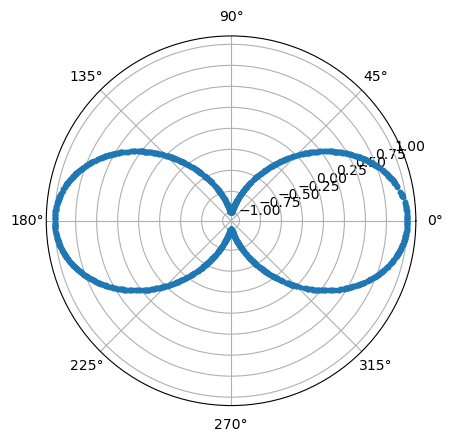

In [45]:
#prepare th training data
train_data_length = 2048
train_data = torch.zeros((train_data_length, 2))
radius = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 0] = radius
train_data[:, 1] = torch.cos(2*radius)
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]
plt.polar(train_data[:, 0], train_data[:, 1], ".")#load data into the pytorch data loader
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [46]:
#implement the discriminator
class Discriminator2(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 512), #the input is two-dimensional
            nn.ReLU(),
            nn.Dropout(0.3), #droput layers reduce overfitting
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),#sigmoid activation to represent probability
        )

    def forward(self, x):
        output = self.model(x)
        return output
    

#implement the generator
class Generator2(nn.Module):
     def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(2, 16),
             nn.ReLU(),
             nn.Linear(16, 32),
             nn.ReLU(),
             nn.Linear(32, 64),
             nn.ReLU(),
             nn.Linear(64, 2),
         )

     def forward(self, x):
         output = self.model(x)
         return output

Epoch: 0 Loss D.: 0.3161085247993469
Epoch: 0 Loss G.: 0.8954448699951172


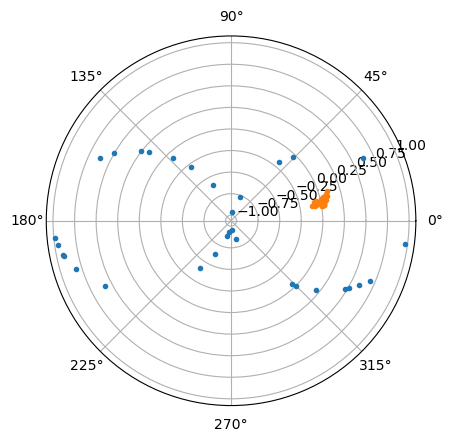

Epoch: 50 Loss D.: 0.5776784420013428
Epoch: 50 Loss G.: 0.9339921474456787


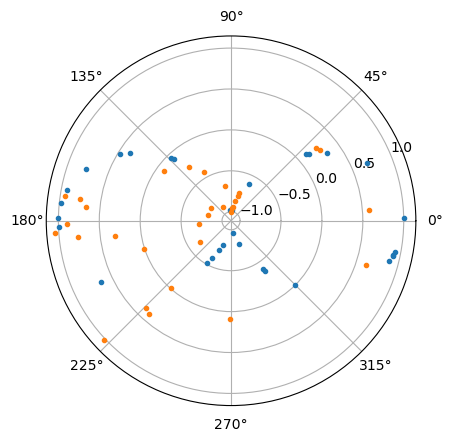

Epoch: 100 Loss D.: 0.730702817440033
Epoch: 100 Loss G.: 0.7685642242431641


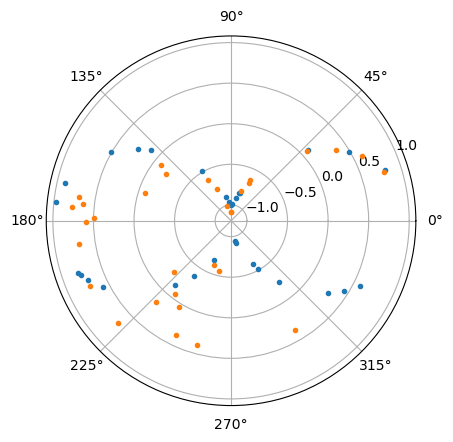

Epoch: 150 Loss D.: 0.6126962900161743
Epoch: 150 Loss G.: 0.8738935589790344


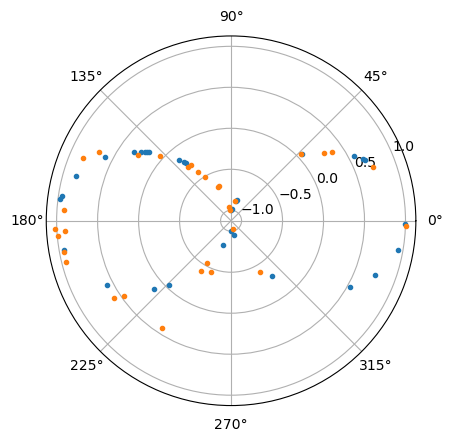

Epoch: 200 Loss D.: 0.6504742503166199
Epoch: 200 Loss G.: 0.8481741547584534


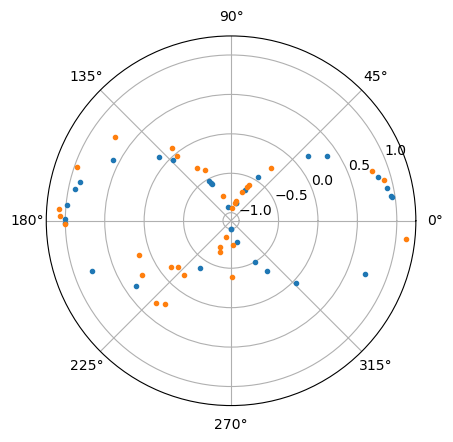

Epoch: 250 Loss D.: 0.634480893611908
Epoch: 250 Loss G.: 0.8173999190330505


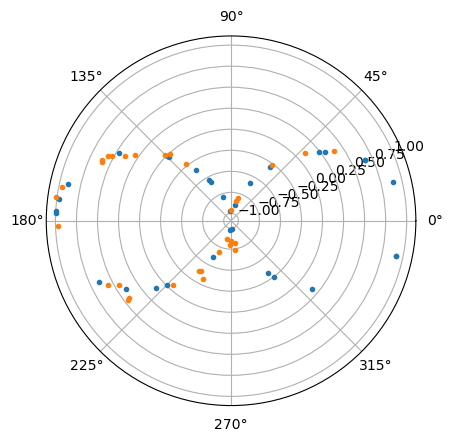

Epoch: 300 Loss D.: 0.6358622312545776
Epoch: 300 Loss G.: 0.8233538866043091


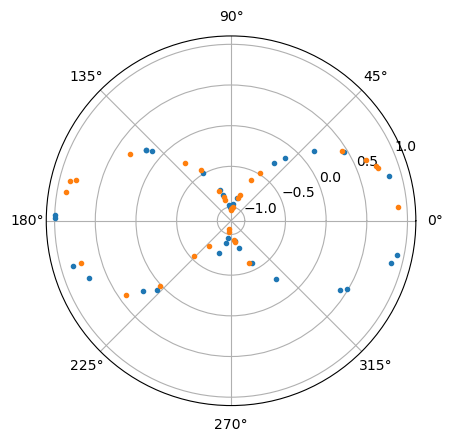

Epoch: 350 Loss D.: 0.6935771703720093
Epoch: 350 Loss G.: 0.7292475700378418


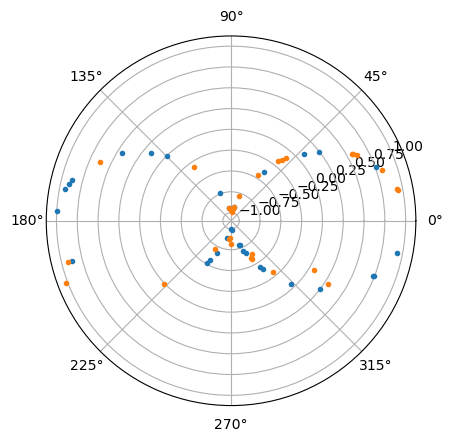

Epoch: 400 Loss D.: 0.7040209174156189
Epoch: 400 Loss G.: 0.7165168523788452


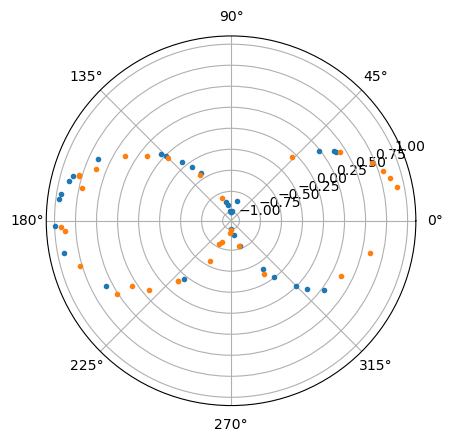

Epoch: 450 Loss D.: 0.6689943075180054
Epoch: 450 Loss G.: 0.7236961722373962


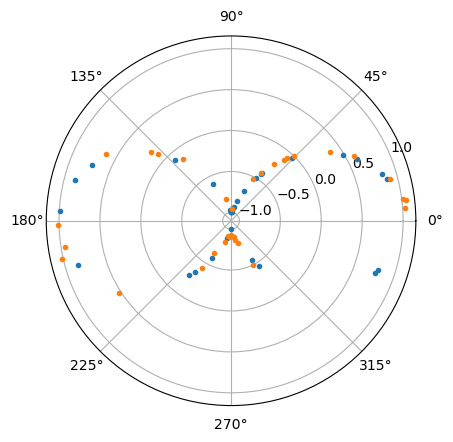

Epoch: 500 Loss D.: 0.6716852188110352
Epoch: 500 Loss G.: 0.8685389757156372


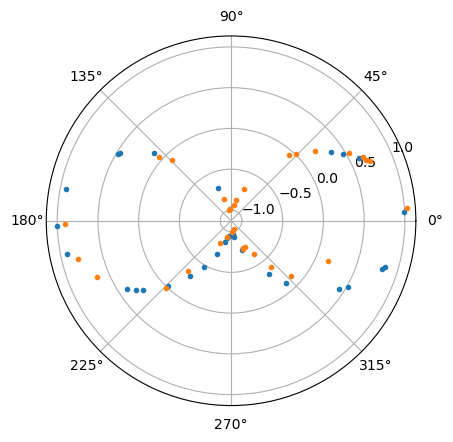

Epoch: 550 Loss D.: 0.6869064569473267
Epoch: 550 Loss G.: 0.7978712320327759


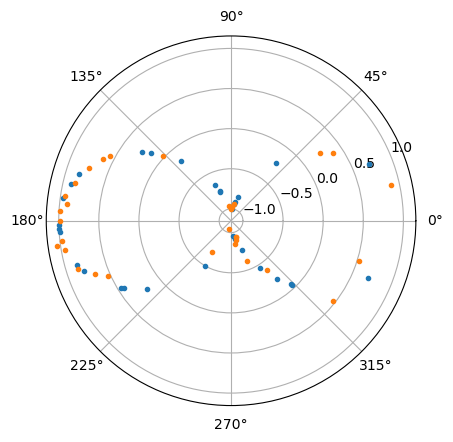

Epoch: 600 Loss D.: 0.6239107251167297
Epoch: 600 Loss G.: 0.7797386646270752


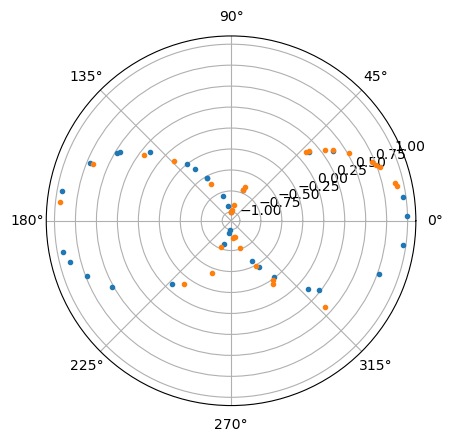

Epoch: 650 Loss D.: 0.6723089814186096
Epoch: 650 Loss G.: 0.7854707837104797


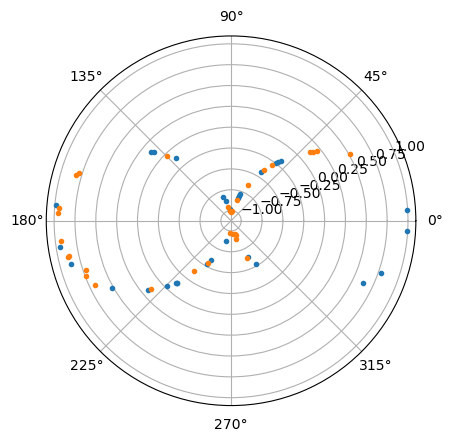

Epoch: 700 Loss D.: 0.617824912071228
Epoch: 700 Loss G.: 0.7526348829269409


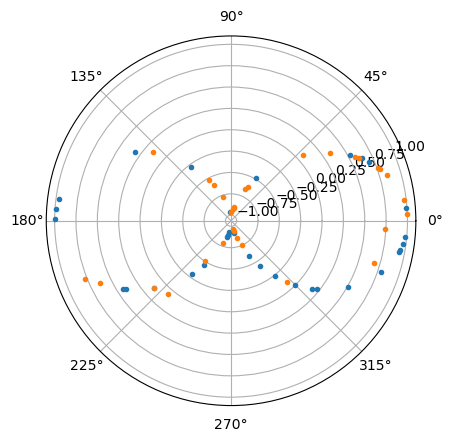

Epoch: 750 Loss D.: 0.6495684385299683
Epoch: 750 Loss G.: 0.8171411752700806


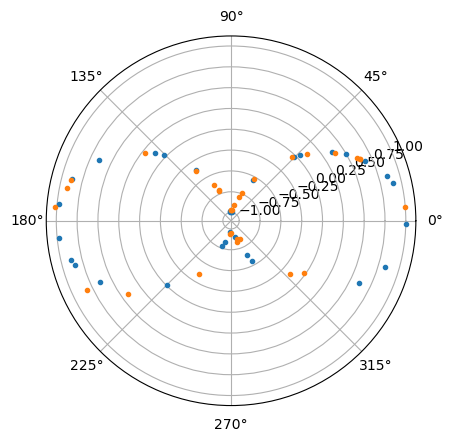

Epoch: 800 Loss D.: 0.6319535970687866
Epoch: 800 Loss G.: 0.7102737426757812


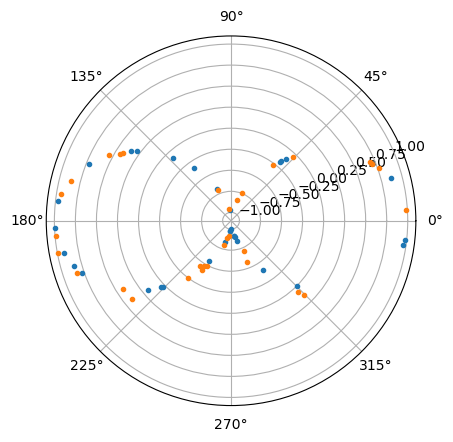

Epoch: 850 Loss D.: 0.6616982221603394
Epoch: 850 Loss G.: 0.7957859039306641


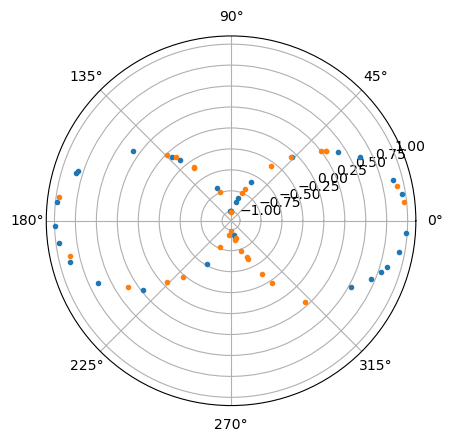

Epoch: 900 Loss D.: 0.627716064453125
Epoch: 900 Loss G.: 0.8419079184532166


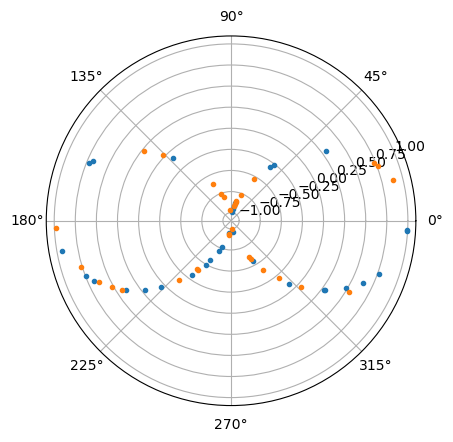

Epoch: 950 Loss D.: 0.61723792552948
Epoch: 950 Loss G.: 0.7454895973205566


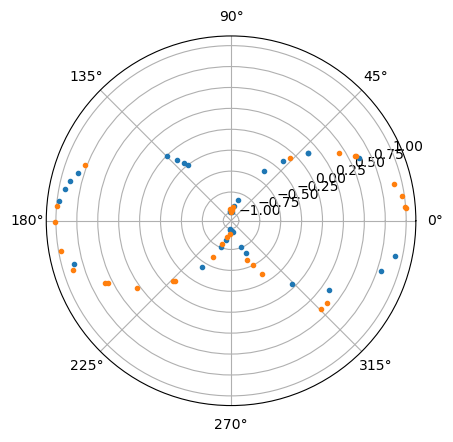

Epoch: 1000 Loss D.: 0.5677967667579651
Epoch: 1000 Loss G.: 1.2378721237182617


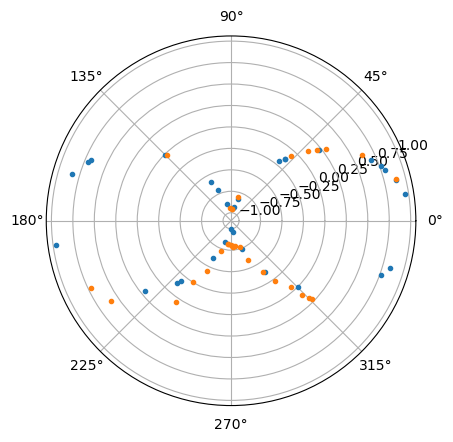

Epoch: 1050 Loss D.: 0.5837993025779724
Epoch: 1050 Loss G.: 0.8654355406761169


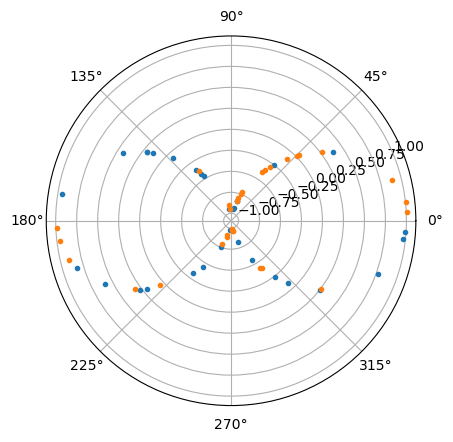

Epoch: 1100 Loss D.: 0.6109563112258911
Epoch: 1100 Loss G.: 0.8511512875556946


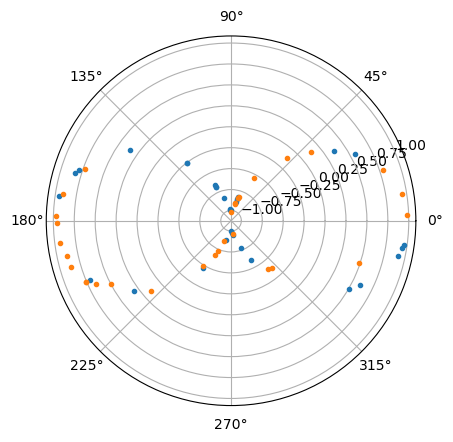

Epoch: 1150 Loss D.: 0.6221644282341003
Epoch: 1150 Loss G.: 1.0239536762237549


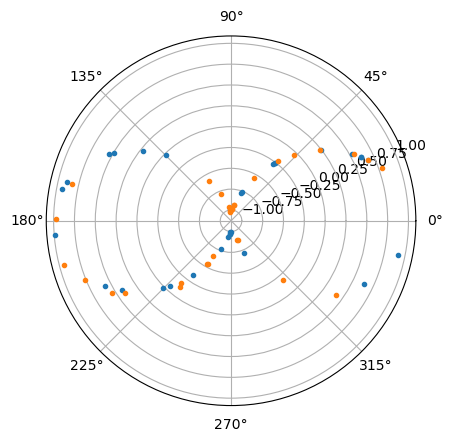

Epoch: 1200 Loss D.: 0.6429105997085571
Epoch: 1200 Loss G.: 0.7384342551231384


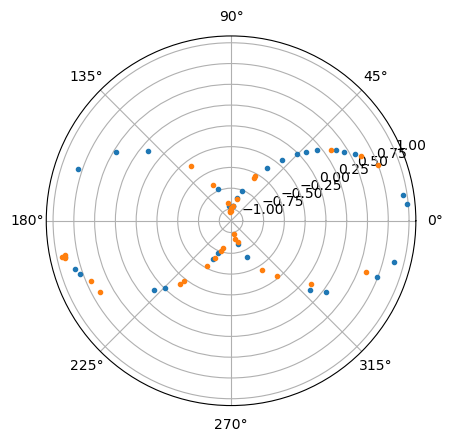

Epoch: 1250 Loss D.: 0.6279262900352478
Epoch: 1250 Loss G.: 0.7621614933013916


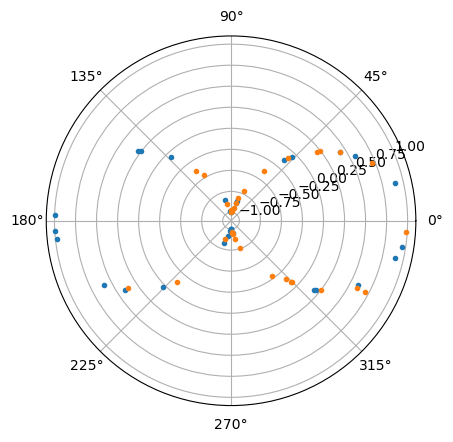

Epoch: 1300 Loss D.: 0.5769678354263306
Epoch: 1300 Loss G.: 1.15948486328125


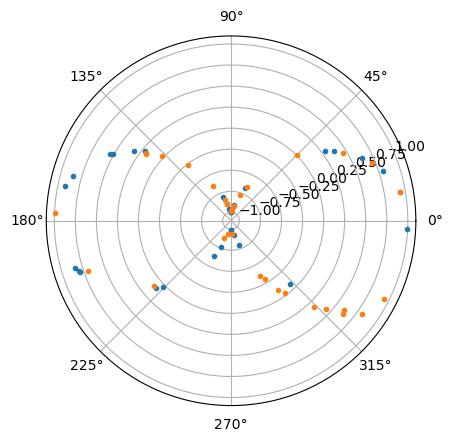

Epoch: 1350 Loss D.: 0.6561580896377563
Epoch: 1350 Loss G.: 0.8385521769523621


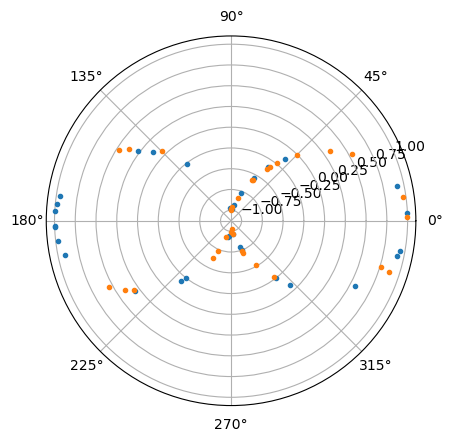

Epoch: 1400 Loss D.: 0.567531168460846
Epoch: 1400 Loss G.: 1.1441025733947754


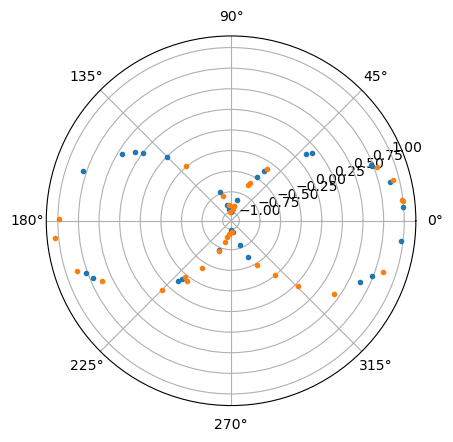

Epoch: 1450 Loss D.: 0.6168698668479919
Epoch: 1450 Loss G.: 0.8693768978118896


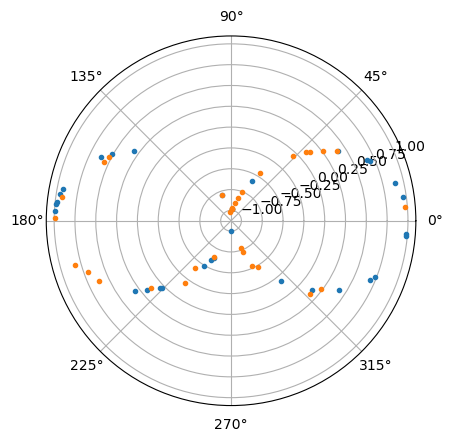

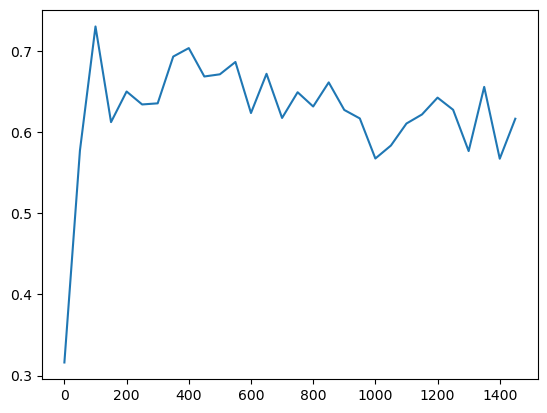

In [47]:
#training loop for the GAN
#set the training parameters
lr = 0.0002
num_epochs = 1500
discriminator = Discriminator2()
generator = Generator2()
gen_loss_vector = []
discr_loss_vector = []
num_epoch_vector = []
#use Adam algorithm to update weights of numerator and discriminator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))      
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #differentiate between real and generated samples

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        #want to minimized generator loss
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        #discriminateor weights frozen since optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)
        optimizer_generator.step()

        # Show loss
        if epoch % 50 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            gen_loss_vector.append(float(loss_generator))
            discr_loss_vector.append(float(loss_discriminator))
            num_epoch_vector.append(epoch)
            
            generated_samples_for_plotting = generated_samples.detach()
            plt.figure()
            plt.polar(real_samples[:, 0], real_samples[:, 1], ".")
            plt.polar(generated_samples_for_plotting[:, 0], generated_samples_for_plotting[:, 1], ".")
            plt.show()
            


#discriminator loss
plt.plot(num_epoch_vector, discr_loss_vector) 
plt.show()

For this question, we substantially modified the structure of the GAN, as we multiplied bu two the number of neurons in the Dicriminator and the the Generator. By using a learning rate of 0.0002 and 1500 epochs we obtained a very good result, as the loss function is very smooth and the generated data is very close to the real data.

## Bonus Question

In [48]:
#implement the discriminator
class Discriminator3(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(60, 512), #the input is two-dimensional
            nn.ReLU(),
            nn.Dropout(0.3), #droput layers reduce overfitting
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 60),
            nn.Sigmoid(),#sigmoid activation to represent probability
        )

    def forward(self, x):
        output = self.model(x)
        return output
    

#implement the generator
class Generator3(nn.Module):
     def __init__(self):
         super().__init__()
         self.model = nn.Sequential(
             nn.Linear(60, 16),
             nn.ReLU(),
             nn.Linear(16, 32),
             nn.ReLU(),
             nn.Linear(32, 64),
             nn.ReLU(),
             nn.Linear(64, 60),
         )

     def forward(self, x):
         output = self.model(x)
         return output

In [49]:
import yfinance as yf

# Fetch the data
stock_data = yf.download('AAPL', start='2015-01-01', end='2019-12-31')

# Extracting the close prices
close_prices = stock_data['Close'].values


import numpy as np

def create_samples(data, sample_length):
    samples = []
    for i in range(0, len(data) - sample_length):
        samples.append(data[i:i + sample_length])
    return np.array(samples)

# Normalize the data
normalized_data = (close_prices - np.mean(close_prices)) / np.std(close_prices)

# Create samples
sample_length = 60
training_samples = create_samples(normalized_data, sample_length)

[*********************100%***********************]  1 of 1 completed


In [50]:
from torch.utils.data import DataLoader, TensorDataset
# Convert training samples to PyTorch tensors
training_samples_tensor = torch.tensor(training_samples, dtype=torch.float32)

# Create a DataLoader
batch_size = 32  # You can adjust this based on your system's capability
train_loader = DataLoader(TensorDataset(training_samples_tensor), batch_size=batch_size, shuffle=True)

# Initialize GAN components
discriminator = Discriminator3()
generator = Generator3()
loss_function = nn.BCELoss()

# Training parameters
lr = 0.0001
num_epochs = 1500

# Optimizers
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

# GAN Training Loop
for epoch in range(num_epochs):
    for n, real_samples in enumerate(train_loader):
        real_samples = real_samples[0]
        # Reshape real_samples to match the input dimensions expected by the Discriminator
        real_samples = real_samples.view(-1, sample_length)  # Adjust the shape if needed

        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))  # Adjust the size if needed
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))  # Adjust the size if needed

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Print and plot loss
        if epoch % 50 == 0 and n == len(train_loader) - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator.item()}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator.item()}")
            

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2 and 60x16)